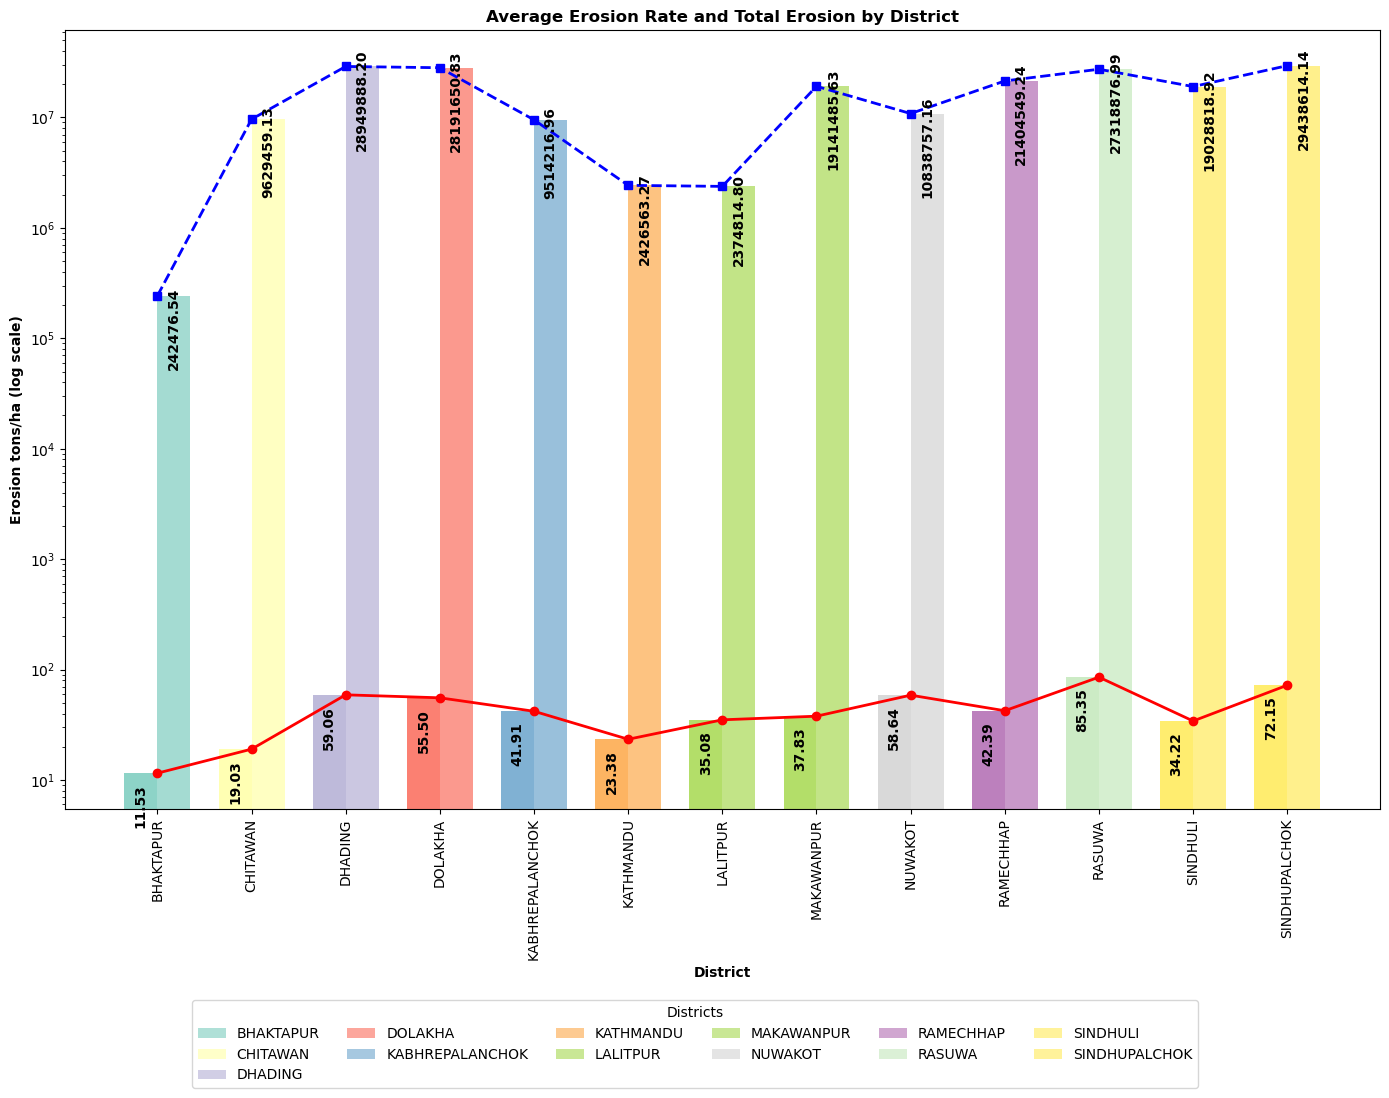

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
df = pd.read_excel(r"D:\CLARK ASSIGNMENTS\1st Sem\Python Programming\Final Project1\erosion_results.xlsx")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 10))

# Set the width of each bar and the positions of the bars
bar_width = 0.35
r1 = np.arange(len(df))
r2 = [x + bar_width for x in r1]

# Create a color palette
colors = plt.cm.Set3(np.linspace(0, 1, len(df)))

# Create the bars with different colors
bars1 = ax.bar(r1, df['Average Erosion Rate (ton/ha/yr)'], color=colors, width=bar_width)
bars2 = ax.bar(r2, df['Total Erosion (ton/yr)'], color=colors, width=bar_width, alpha=0.8)

# Add line graphs
ax.plot(r1 + bar_width/2, df['Average Erosion Rate (ton/ha/yr)'], color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax.plot(r1 + bar_width/2, df['Total Erosion (ton/yr)'], color='blue', marker='s', linestyle='--', linewidth=2, markersize=6)

# Set logarithmic scale for y-axis
ax.set_yscale('log')

# Customize the plot
ax.set_xlabel('District', fontweight='bold')
ax.set_ylabel('Erosion tons/ha (log scale)', fontweight='bold')
ax.set_title('Average Erosion Rate and Total Erosion by District', fontweight='bold')

# Set x-ticks in the middle of the grouped bars
ax.set_xticks([r + bar_width/2 for r in range(len(df))])

# Rotate x-axis labels and position them vertically and in the middle
ax.set_xticklabels(df['District'], rotation=90, ha='center', va='top')

# Adjust the bottom margin to make room for the labels
plt.subplots_adjust(bottom=0.3)

# Add value labels in the center of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{height:.2f}',
                ha='center', va='center', rotation=90, color='black', fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)

# Create a legend for districts outside the plot area
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='none', alpha=0.7) for i in range(len(df))]
fig.legend(legend_elements, df['District'], loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.1), 
           bbox_transform=fig.transFigure, title='Districts')

# # Add text labels for Average Erosion Rate and Total Erosion
# ax.text(0.02, 0.98, 'Solid: Average Erosion Rate (ton/ha/yr)', transform=ax.transAxes, va='top', fontweight='bold')
# ax.text(0.02, 0.94, 'Transparent: Total Erosion (ton/yr)', transform=ax.transAxes, va='top', fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()